<a href="https://colab.research.google.com/github/Vey27/NLP-and-Speech-Recognition/blob/main/NLP_Chatbot_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP_Chatbot_Health

This chatbot is developed to support users in finding medical resources conveniently, whether they are at home or out and about. It can provide assistance with tasks such as recording blood pressure history, locating nearby pharmacies, checking for adverse drug reactions, finding the nearest hospital, and retrieving hospital details. However, please note that this application is a short demo and does not include all the features and details that a fully developed application would have. The chatbot will provide concise responses, but in a real application, it would undergo further training to enhance its capabilities.

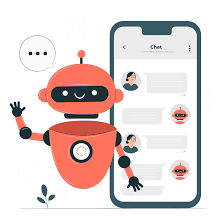

In [38]:
!pip install streamlit
import streamlit as st

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import numpy as np
import random

# Deep Learning modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# for file processing
import json
import pickle
from tqdm import tqdm

# natural language processing modules
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Load NLTK dependencies
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Section 1: Train the Chatbot Model

In [40]:
# Load NLTK dependencies
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Helper functions for Pre-Processing

In [41]:
def read_json_file(file_path):
    with open(file_path, 'r') as file: data = json.load(file)
    return data

In [42]:
def preprocess_data(data):

     # creating lists for NLP
    words = []
    classes = []
    documents = []
    ignore_words = ['?', '!']

    lemmatizer = WordNetLemmatizer()
    for command in data['intents']:
        for pattern in command['patterns']:
            # Tokenize each word
            w = nltk.word_tokenize(pattern)
            words.extend(w)
            # Add documents to the corpus
            documents.append((w, command['tag']))
            # Add to classes list
            if command['tag'] not in classes:
                classes.append(command['tag'])
    # Lemmatize, convert to lowercase, and remove duplicates
    words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
    words = sorted(list(set(words)))
    classes = sorted(list(set(classes)))

    return words, classes, documents


In [43]:
def load_pickle_data():
    with open('words.pkl', 'rb') as f:
        words = pickle.load(f)
    with open('classes.pkl', 'rb') as f:
        classes = pickle.load(f)
    with open('documents.pkl', 'rb') as f:
        documents = pickle.load(f)
    return words, classes, documents

In [44]:
def create_training_data(words, classes, documents):
    training = []
    output_empty = [0] * len(classes)

    for doc in documents:
        bag = []
        pattern_words = doc[0]
        pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

        for w in words:
            bag.append(1) if w in pattern_words else bag.append(0)

        output_row = list(output_empty)
        output_row[classes.index(doc[1])] = 1

        training.append([bag, output_row])

    random.shuffle(training)
    train_x = [sequence[0] for sequence in training]
    train_y = [sequence[1] for sequence in training]

    return np.array(train_x), np.array(train_y)

# Main Training App

In [46]:
print("Train the chatbot model ⚙️")
print("\nLet's train the chatbot model by following the sequence of steps provided below:")

file_path = input("http://localhost:8888/edit/Python/NLP%20and%20Speech%20Recognition/ChatBot/commands.json")
try:
  data = read_json_file(file_path)

  print("JSON Data:")
  print(json.dumps(data, indent=4))

  # Preprocess the data
  words, classes, documents = preprocess_data(data)

  # Save the preprocessed data as pickle files
  with open('words.pkl', 'wb') as f:
    pickle.dump(words, f)
  with open('classes.pkl', 'wb') as f:
    pickle.dump(classes, f)
  with open('documents.pkl', 'wb') as f:
    pickle.dump(documents, f)

  # Display the processed data
  print("Preprocessing Results:")
  print(len(documents), "documents")
  print(len(classes), "classes", classes)
  print(len(words), "unique lemmatized words", words)

except json.JSONDecodeError:

  print("Invalid JSON file.")

Train the chatbot model ⚙️

Let's train the chatbot model by following the sequence of steps provided below:
http://localhost:8888/edit/Python/NLP%20and%20Speech%20Recognition/ChatBot/commands.jsoncommands.json
JSON Data:
{
    "intents": [
        {
            "tag": "greeting",
            "patterns": [
                "Hi there",
                "How are you",
                "Is anyone there?",
                "Hey",
                "Hola",
                "Hello",
                "Good day"
            ],
            "responses": [
                "Hello, thanks for asking",
                "Good to see you again",
                "Hi there, how can I help?"
            ],
            "context": [
                ""
            ]
        },
        {
            "tag": "goodbye",
            "patterns": [
                "Bye",
                "See you later",
                "Goodbye",
                "Nice chatting to you, bye",
                "Till next time"
            ],
 

# Load the Pickle data for training

In [47]:
if input("Load pickle data? (y/n): ").lower() == "y":
  # Create tqdm progress bar
  with tqdm(total=100, desc="Creating training data ...") as pbar:
    words, classes, documents = load_pickle_data()

    # Update progress bar
    pbar.update(100)
    print("\n")

    print("Words:")
    print(words)
    print("\n")

    print("Classes:")
    print(classes)
    print("\n")

    print("Documents:")
    print(documents)

Load pickle data? (y/n): y


Creating training data ...: 100%|██████████| 100/100 [00:00<00:00, 18911.15it/s]



Words:
["'s", ',', 'a', 'adverse', 'all', 'anyone', 'are', 'awesome', 'be', 'behavior', 'blood', 'by', 'bye', 'can', 'causing', 'chatting', 'check', 'could', 'data', 'day', 'detail', 'do', 'dont', 'drug', 'entry', 'find', 'for', 'give', 'good', 'goodbye', 'have', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'history', 'hola', 'hospital', 'how', 'i', 'id', 'is', 'later', 'list', 'load', 'locate', 'log', 'looking', 'lookup', 'management', 'me', 'module', 'nearby', 'next', 'nice', 'of', 'offered', 'open', 'patient', 'pharmacy', 'pressure', 'provide', 'reaction', 'related', 'result', 'search', 'searching', 'see', 'show', 'suitable', 'support', 'task', 'thank', 'thanks', 'that', 'there', 'till', 'time', 'to', 'transfer', 'up', 'want', 'what', 'which', 'with', 'you']


Classes:
['adverse_drug', 'blood_pressure', 'blood_pressure_search', 'goodbye', 'greeting', 'hospital_search', 'options', 'pharmacy_search', 'thanks']


Documents:
[(['Hi', 'there'], 'greeting'), (['How', 'are', 'you'

# Create training and testing data

In [48]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [49]:
# Training Data Creation
training = []
# Define Output Array
output_empty = [0] * len(classes)
# Training data as Bag of words for respective sentence
for doc in documents:
    # Bag of words Intialization
    bag = []
    # tokenized word list as pattern
    pattern_words = doc[0]
    # lemmatize the wordsand define the meaning
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # Creation of bag of words array with 1, if it matches in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for each pattern
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [50]:
# separate out training data into X_train (inputs) and y_train (outputs)
X_train = []
y_train = []

for (bag, output_row) in training:
    X_train.append(bag)
    y_train.append(output_row)

# then convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)


In [51]:
import pandas as pd
training_df = pd.DataFrame(training)

In [52]:
training_df.head()

,0,1
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0]"
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [53]:
# create train and test dataset
train_x = list(training_df.iloc[:, 0])
train_y = list(training_df.iloc[:, 1])
print("Training data created")

Training data created


In [54]:
print(np.array(train_x).shape)


(47, 88)


In [55]:
# Convert train_x to a numpy array
train_x = np.array(train_x)

# Reshape train_x
train_x = np.reshape(train_x, (train_x.shape[0], -1))


# Building the Chatbot Model

## Create training and testing data

In [56]:
if input("Create training data? (y/n): ").lower() == "y":
    try:
        # Create tqdm progress bar
        with tqdm(total=100, desc="Creating training data ...") as pbar:
            train_x, train_y = create_training_data(words, classes, documents)

            # Update progress bar
            pbar.update(100)

        print("\nTraining data created")
        print(f"Training data (train_x): {len(train_x)} samples")
        print(f"Training data (train_y): {len(train_y)} samples")

    except Exception as e:
        print("An error occurred during training data creation.")
        print(str(e))


Create training data? (y/n): y


Creating training data ...: 100%|██████████| 100/100 [00:00<00:00, 38962.42it/s]


Training data created
Training data (train_x): 47 samples
Training data (train_y): 47 samples


# Building the Chatbot Model

1. Run the function and enter “y” to build the model.
2. Enter the following values when prompted:
    - Number of layers: 3
    - Number of epochs: 200
    - Batch size: 5
    - Activation function (relu/sigmoid/softmax): relu

In [57]:
if input("Build the model? (y/n): ").lower() == "y": # Get user inputs
    num_layers = int(input("Number of layers: "))
    epochs = int(input("Number of epochs: "))
    batch_size = int(input("Batch size: "))
    activation_functions = ['relu', 'sigmoid', 'softmax']
    activation_function = input("Activation function (relu/sigmoid/softmax): ")
    try:
        # Create tqdm progress bar
        with tqdm(total=100, desc="Building the model ...") as pbar:
            # Create model
            model = Sequential()
            # Add layers to the model based on user input
            for i in range(num_layers):
                if i == 0:
                    # Input layer
                    model.add(Dense(128, input_shape=(len(train_x[0]),), activation=activation_function))
                else:
                    # Hidden layers
                    model.add(Dense(64, activation=activation_function))
                    model.add(Dropout(0.5))
                    # Output layer
                    model.add(Dense(len(train_y[0]), activation='softmax'))
                    # Compile model
                    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
                    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
                    # Fit the model
                    hist = model.fit(np.array(train_x), np.array(train_y), epochs=epochs, batch_size=batch_size, verbose=1)
                    # Save the model
                    model.save('chatbot_model.h5')
                    # Update progress bar
                    pbar.update(100)
            print("\nThe chatbot model is created")

            # Display training loss and accuracy summary
            print("\nTraining Summary")
            print("Training Loss:", hist.history['loss'][-1])
            print("Training Accuracy:", hist.history['accuracy'][-1])


    except Exception as e:
        print("An error occurred during model building.")
        print(str(e))

 #Enter the following values when prompted:
    #- Number of layers: 3
   # - Number of epochs: 200
    #- Batch size: 5
   # - Activation function (relu/sigmoid/softmax): relu

Build the model? (y/n): y
Number of layers: 3
Number of epochs: 200
Batch size: 5
Activation function (relu/sigmoid/softmax): relu


Building the model ...:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/200
10/10 [==============================] - 0s 2ms/step - loss: 2.2340 - accuracy: 0.1277
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 2.1566 - accuracy: 0.2553
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 2.0715 - accuracy: 0.2553
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 1.8929 - accuracy: 0.5106
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 1.8642 - accuracy: 0.5106
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 1.6858 - accuracy: 0.6809
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5070 - accuracy: 0.6170
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4327 - accuracy: 0.6809
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 1.1664 - accuracy: 0.7872
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 0.9642 - accuracy: 0.8723
Epoch 11/

Building the model ...: 100%|██████████| 100/100 [00:08<00:00, 11.28it/s]

Epoch 1/200
10/10 [==============================] - 1s 2ms/step - loss: 2.1659 - accuracy: 0.1064
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 2.0044 - accuracy: 0.3617
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 1.9056 - accuracy: 0.4894
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 1.7482 - accuracy: 0.6170
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5866 - accuracy: 0.7447
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4401 - accuracy: 0.8298
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 1.3046 - accuracy: 0.8085
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.2382 - accuracy: 0.8936
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 1.0319 - accuracy: 0.9574
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 1.0000
Epoch 11/

Building the model ...: 200it [00:15, 13.02it/s]


The chatbot model is created

Training Summary
Training Loss: 0.5491639375686646
Training Accuracy: 0.914893627166748


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


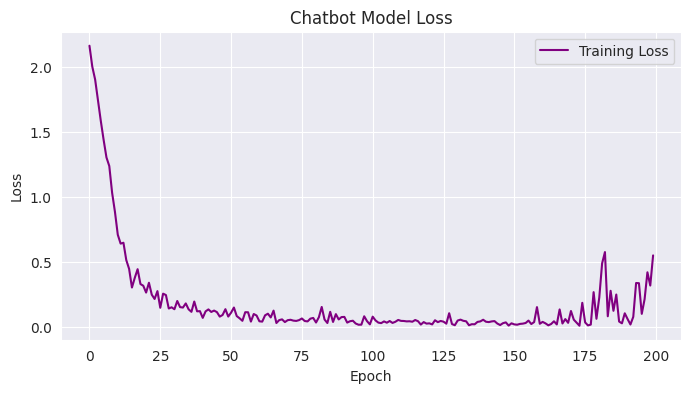

In [59]:
# Set the style of the plot
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot the training loss
plt.plot(hist.history['loss'], label='Training Loss',color='purple')

# Check if validation loss is recorded
if 'val_loss' in hist.history:
  plt.plot(hist.history['val_loss'], label='Validation Loss')

# Set the title and axis labels
plt.title('Chatbot Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


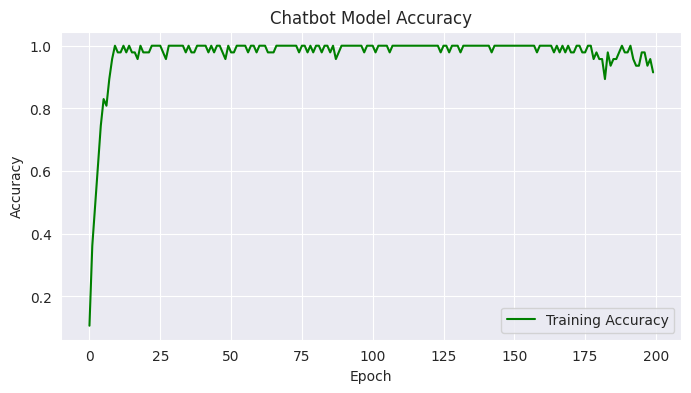

In [60]:
# Set the style of the plot
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot the training accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='Green')

# Check if validation accuracy is recorded
if 'val_accuracy' in hist.history:
  plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')

# Set the title and axis labels
plt.title('Chatbot Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Demo the Chatbot Model

In [61]:
import time
from nltk.stem import WordNetLemmatizer
from keras.models import load_model

In [62]:
import requests
import json

# Load commands
commands = json.loads(open('commands.json').read())



In [63]:
# Load preprocessed data and the model
chatbot_model = load_model('chatbot_model.h5')

# Helper functions for Processing rhe data

In [64]:
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words


## Converts a sentence into a bag of words

In [65]:
def bag_of_words(sentence, words):
    sentence_words = clean_up_sentence(sentence)
    bag = np.zeros(len(words), dtype=np.float32)
    indices = np.where(np.isin(words, sentence_words))
    bag[indices] = 1
    return bag

## Predicts the intent

In [66]:
def predict_class(sentence, words, classes, chatbot_model):
    p = bag_of_words(sentence, words)
    res = chatbot_model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    threshold_indices = np.where(res > ERROR_THRESHOLD)[0]
    results = [{"intent": classes[i], "probability": str(res[i])} for i in threshold_indices]
    results.sort(key=lambda x: x["probability"], reverse=True)
    return results


## Retrieves a random response

In [67]:
import random

def get_random_response(commands_json, tag):
    list_of_commands = commands_json["intents"]
    for i in list_of_commands:
        if i["tag"] == tag:
            result = random.choice(i["responses"])
            return result
    return "I'm sorry, I don't understand."




## Generate a response

In [68]:
def chatbot_response(text, words, classes, chatbot_model, commands):
    start_time = time.time()
    ints = predict_class(text, words, classes, chatbot_model)
    elapsed_time = time.time() - start_time
    if ints:
        tag = ints[0]['intent']
        res = get_random_response(commands, tag)
        return res, elapsed_time
    else:
        return "I'm sorry, I don't understand.", elapsed_time

## Interactive conversations

In [69]:

# reset
past = []
generated_responses = []
execution_times = []
print("Chatbot: Hi, how can I assist you today?")
print("Chatbot: You can start the conversation by typing your message. To exit, type 'exit'.")
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        break
    response, exec_time = chatbot_response(user_input, words, classes, chatbot_model, commands)
    print("\nChatbot:", response)
    print(f"\nExecution Time: {exec_time:.2f} seconds")
    print("\n")


Chatbot: Hi, how can I assist you today?
Chatbot: You can start the conversation by typing your message. To exit, type 'exit'.
You: hello
1/1 [==============================] - 0s 53ms/step

Chatbot: Hi there, how can I help?

Execution Time: 0.09 seconds


You: Find a Pharmacy
1/1 [==============================] - 0s 15ms/step

Chatbot: Please provide pharmacy name

Execution Time: 0.05 seconds


You: Walgreens
1/1 [==============================] - 0s 18ms/step

Chatbot: Good to see you again

Execution Time: 0.06 seconds


You: How can you help me?
1/1 [==============================] - 0s 17ms/step

Chatbot: I can guide you through Adverse drug reaction list, Blood pressure tracking, Hospitals and Pharmacies

Execution Time: 0.05 seconds


You: okay
1/1 [==============================] - 0s 16ms/step

Chatbot: Good to see you again

Execution Time: 0.05 seconds


You: Goodbye
1/1 [==============================] - 0s 15ms/step

Chatbot: See you!

Execution Time: 0.05 seconds


You

Chatbot: Hi, how can I assist you today?
Chatbot: You can start the conversation by typing your message. To exit, type 'exit'.
You: Hello
1/1 [==============================] - 0s 15ms/step

Chatbot: Hello, thanks for asking

Execution Time: 0.05 seconds


You: Find a Pharmacy
1/1 [==============================] - 0s 15ms/step

Chatbot: Please provide pharmacy name

Execution Time: 0.05 seconds


You: Walgreens
1/1 [==============================] - 0s 17ms/step

Chatbot: Good to see you again

Execution Time: 0.06 seconds


You: How can you help me?
1/1 [==============================] - 0s 18ms/step

Chatbot: I can guide you through Adverse drug reaction list, Blood pressure tracking, Hospitals and Pharmacies

Execution Time: 0.07 seconds


You: Okay
1/1 [==============================] - 0s 16ms/step

Chatbot: Hello, thanks for asking

Execution Time: 0.05 seconds


You: Goodbye
1/1 [==============================] - 0s 16ms/step

Chatbot: Have a nice day

Execution Time: 0.05 seco

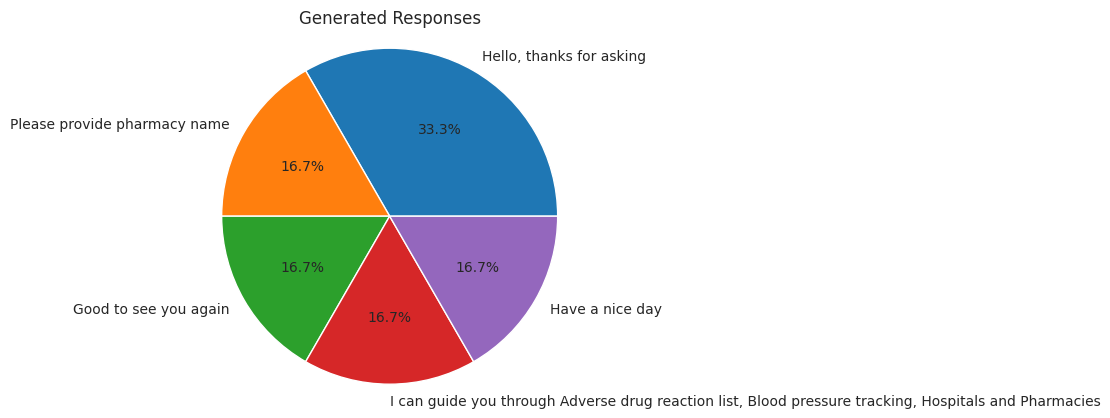

In [74]:
import matplotlib.pyplot as plt

# reset
past = []
generated_responses = []
execution_times = []
print("Chatbot: Hi, how can I assist you today?")
print("Chatbot: You can start the conversation by typing your message. To exit, type 'exit'.")

while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        break
    response, exec_time = chatbot_response(user_input, words, classes, chatbot_model, commands)
    generated_responses.append(response)
    execution_times.append(exec_time)
    print("\nChatbot:", response)
    print(f"\nExecution Time: {exec_time:.2f} seconds")
    print("\n")

# Generate pie chart
response_counts = {}
for response in generated_responses:
    if response in response_counts:
        response_counts[response] += 1
    else:
        response_counts[response] = 1

labels = list(response_counts.keys())
values = list(response_counts.values())

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Generated Responses")

plt.show()


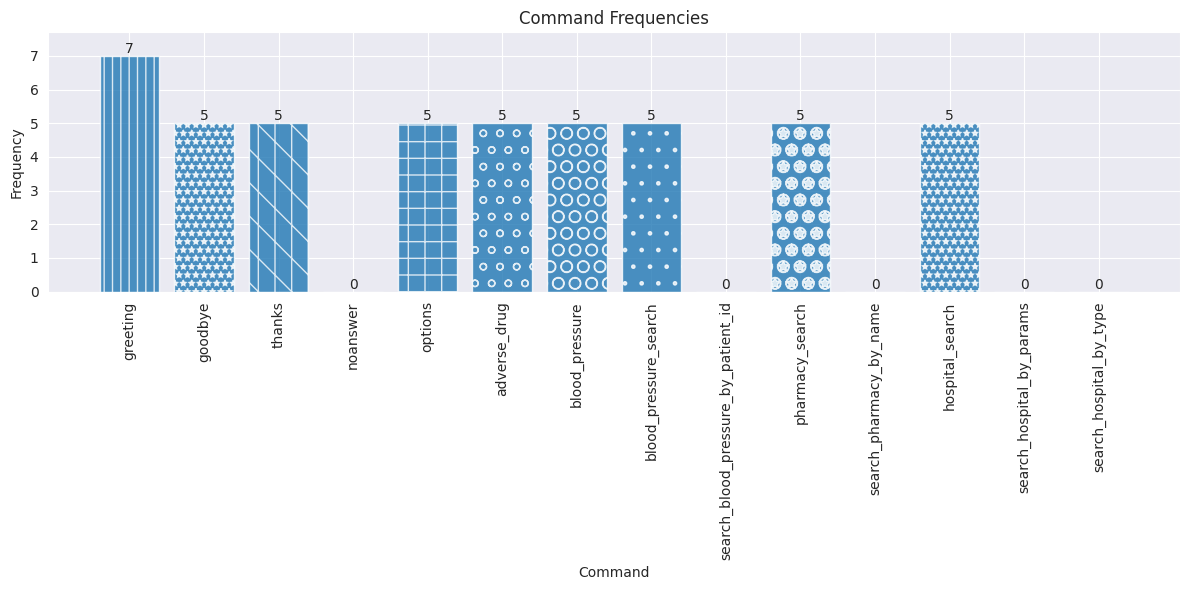

In [117]:
# Read the JSON file
with open('commands.json', 'r') as file:
    commands = json.load(file)

# Get command names and frequencies
command_names = [command['tag'] for command in commands['intents']]
frequencies = [len(command['patterns']) for command in commands['intents']]

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(command_names, frequencies)

# Add labels to the end of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Command')
plt.ylabel('Frequency')
plt.title('Command Frequencies')

# Set the y-axis limit to provide space for the labels
ax.set_ylim(top=max(frequencies) * 1.1)

# Customize the shape of the bars with different patterns
patterns = ['||','**', '\|', 'x', '+', 'o', 'O', '.', '*','O*']
for i, bar in enumerate(bars):
    bar.set_facecolor('#1f77b4')
    bar.set_alpha(0.8)
    bar.set_hatch(patterns[i % len(patterns)])  # Assign a pattern to each bar

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [76]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


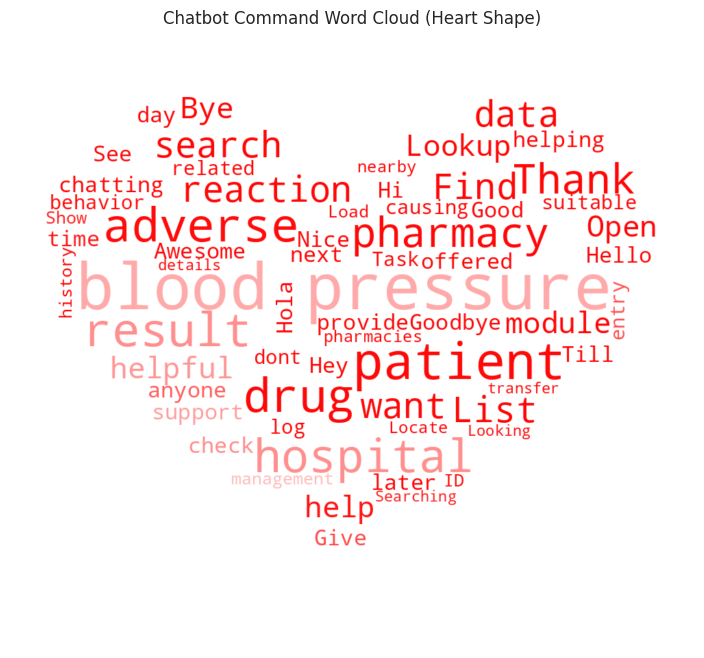

In [130]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

# Read the JSON file
with open('commands.json', 'r') as file:
    data = json.load(file)

# Extract all patterns from the intents
patterns = []
for intent in data['intents']:
    patterns.extend(intent['patterns'])

# Convert patterns to a single string
text = ' '.join(patterns)

# Load the heart-shaped mask image and resize it
mask_image = np.array(Image.open('heart.png').convert('RGB').resize((1000, 900)))

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=900, background_color='white', mask=mask_image).generate(text)

# Color the word cloud based on the mask image
image_colors = ImageColorGenerator(mask_image)
colored_wordcloud = wordcloud.recolor(color_func=image_colors)

# Plot the word cloud
plt.figure(figsize=(18, 8))
plt.imshow(colored_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chatbot Command Word Cloud (Heart Shape)')
plt.show()


## I will try out Chatbot Web Application with Streamlit soon!